In [8]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

traindf = pd.read_csv('A4/dataset/train.csv')
testdf = pd.read_csv('A4/dataset/test.csv')

cat_cols = ['Address', 'Possesion','Furnishing']


# CODING SECTION

## 2. Data Preprocessing and Exploratory Data Analysis

### QUESTION 1

In [9]:
#summarizing the unique values in each column
for col in traindf.columns:
    print(col, traindf[col].nunique())

#calculating the mean, standard deviation, min, max and percentiles(25,50,75) of the numerical columns
print(traindf.describe())

index 6256
Address 3223
Possesion 1
Furnishing 3
Buildup_area 944
Carpet_area 2520
Bathrooms 85
Property_age 46
Parking 10
Price 755
Brokerage 1517
Floor 125
Per_sqft_price 2501
BHK 9
Total_bedrooms 27
             index  Buildup_area   Carpet_area    Bathrooms  Property_age  \
count  6256.000000   6256.000000   6256.000000  6256.000000   6256.000000   
mean   4879.818894   1120.690537    864.869801     1.968057      7.519661   
std    2770.439333    735.147038    583.283918     0.911779      7.374092   
min       1.000000    180.000000    150.000000     1.000000      1.000000   
25%    2494.750000    650.000000    475.000000     1.000000      2.000000   
50%    4920.500000    950.000000    708.315583     2.000000      5.000000   
75%    7276.250000   1325.000000   1050.000000     2.000000     10.000000   
max    9546.000000  15000.000000  14000.000000    10.000000     99.000000   

           Parking         Price     Brokerage        Floor  Per_sqft_price  \
count  6256.000000  6.256

### QUESTION 2

Index(['index', 'Buildup_area', 'Carpet_area', 'Bathrooms', 'Property_age',
       'Parking', 'Price', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK',
       'Total_bedrooms'],
      dtype='object')


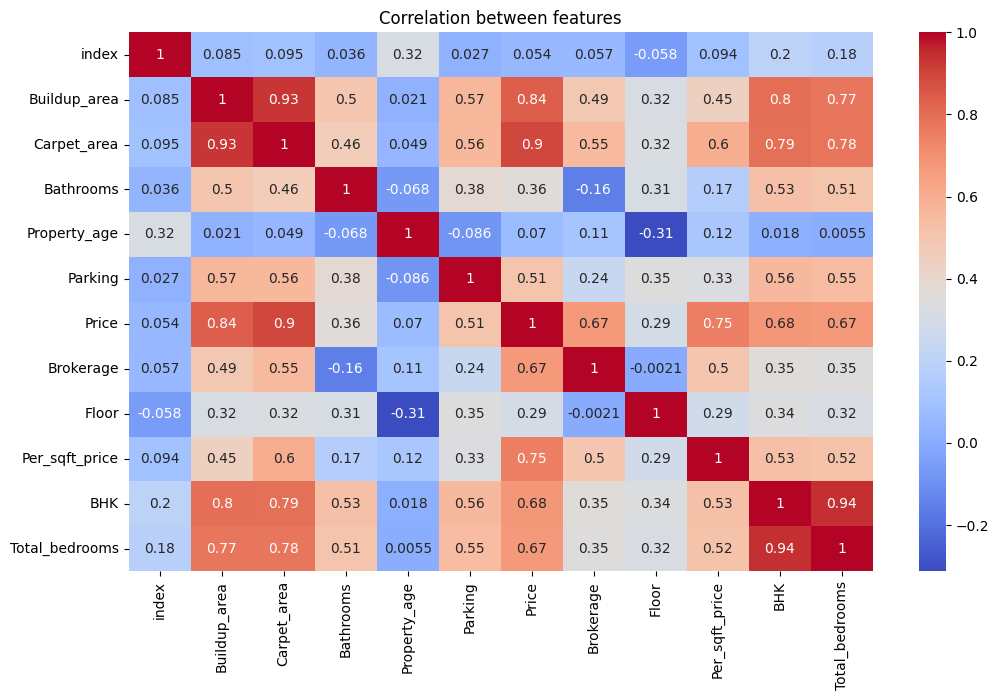

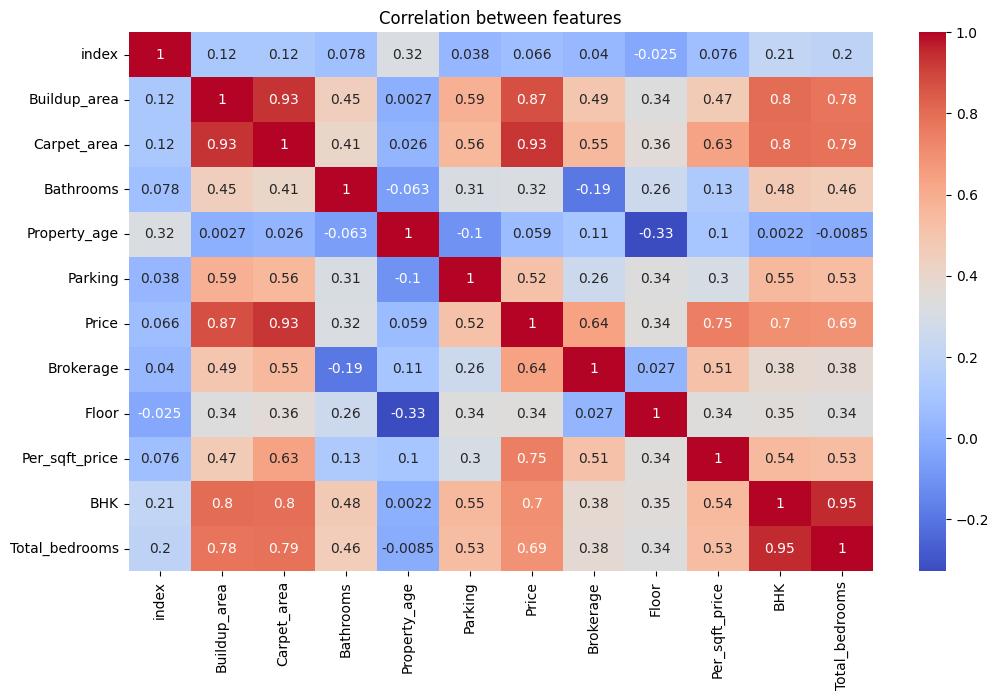

In [10]:
num_cols = traindf.select_dtypes(include=[np.number])
num_cols_test = testdf.select_dtypes(include=[np.number])
print(num_cols.columns)

plt.figure(figsize=(12, 7))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()


plt.figure(figsize=(12, 7))
sns.heatmap(num_cols_test.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

In [11]:
target = traindf['Price']

correlation_with_target = num_cols.apply(lambda x: x.corr(target))


weak_correlation = correlation_with_target[(correlation_with_target >= -0.1) & (correlation_with_target <= 0.1)].index

dropped_columns = weak_correlation
traindf = traindf.drop(columns=weak_correlation)
testdf = testdf.drop(columns=weak_correlation)

print(traindf.columns)
num_cols = traindf.select_dtypes(include=[np.number])

print(dropped_columns)


Index(['Address', 'Possesion', 'Furnishing', 'Buildup_area', 'Carpet_area',
       'Bathrooms', 'Parking', 'Price', 'Brokerage', 'Floor', 'Per_sqft_price',
       'BHK', 'Total_bedrooms'],
      dtype='object')
Index(['index', 'Property_age'], dtype='object')


### QUESTION 3

In [12]:
le = LabelEncoder()
le_test = LabelEncoder()
for col in cat_cols:
    traindf[col] = le.fit_transform(traindf[col])
    testdf[col] = le_test.fit_transform(testdf[col])


# traindf = traindf.drop(columns=['Possesion'])
print(traindf.head())

   Address  Possesion  Furnishing  Buildup_area  Carpet_area  Bathrooms  \
0      183          0           1         615.0   508.043150        1.0   
1       15          0           1        1200.0   724.772558        3.0   
2     3106          0           1        3300.0  2300.000000        5.0   
3     1478          0           2         800.0   642.570682        1.0   
4      305          0           1        2000.0  1602.321210        4.0   

   Parking      Price   Brokerage  Floor  Per_sqft_price  BHK  Total_bedrooms  
0        0   14500000  14500000.0    7.0         23580.0  2.0             2.0  
1        1   18500000  18500000.0   13.0         15420.0  2.0             2.0  
2        3  125000000   1250000.0   32.0         37880.0  4.0             4.0  
3        1   16000000  16000000.0    4.0         20000.0  2.0             2.0  
4        2   85000000  85000000.0   12.0         42500.0  3.0             3.0  


### QUESTION 4

In [13]:
scaler = StandardScaler()


num_cols = num_cols.drop(columns='Price')
print(num_cols.columns)
traindf[num_cols.columns] = scaler.fit_transform(traindf[num_cols.columns])
testdf[num_cols.columns] = scaler.transform(testdf[num_cols.columns])
print(traindf)

Index(['Buildup_area', 'Carpet_area', 'Bathrooms', 'Parking', 'Brokerage',
       'Floor', 'Per_sqft_price', 'BHK', 'Total_bedrooms'],
      dtype='object')
      Address  Possesion  Furnishing  Buildup_area  Carpet_area  Bathrooms  \
0         183          0           1     -0.687932    -0.611804  -1.061809   
1          15          0           1      0.107891    -0.240206   1.131881   
2        3106          0           1      2.964691     2.460628   3.325572   
3        1478          0           2     -0.436261    -0.381147  -1.061809   
4         305          0           1      1.196196     1.264411   2.228726   
...       ...        ...         ...           ...          ...        ...   
6251     1621          0           1     -0.735545    -0.821055  -1.061809   
6252      246          0           1     -0.441703    -0.316972   0.035036   
6253      804          0           1     -0.572299    -0.282680   0.035036   
6254      107          0           2     -0.225402    -0.265535

### QUESTION 5

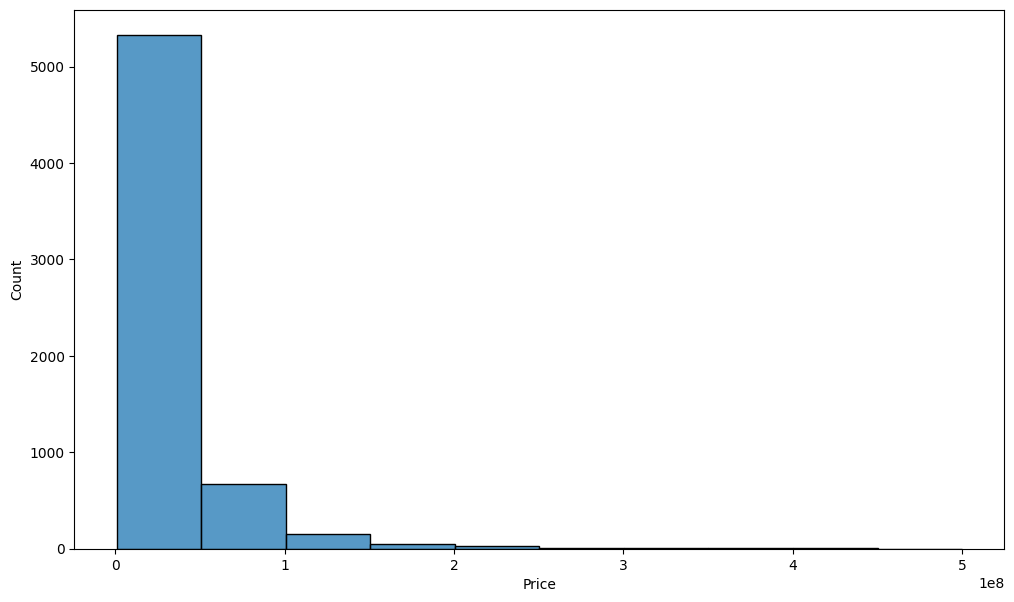

In [14]:
target = traindf['Price']

plt.figure(figsize=(12, 7))
sns.histplot(target, bins=10)
plt.show()

In [15]:
# # creating a new column to categorize the price into 4 categories
# traindf['Price_category'] = pd.qcut(traindf['Price'], q=4, labels=['low', 'medium', 'high', 'very high'])
# print(traindf['Price_category'])



### QUESTION 6

In [16]:
# # using random under-sampling to balance the dataset
# over_sampler = SMOTE(sampling_strategy='auto', random_state=42)


# X = traindf.drop(['Price', 'Price_category'], axis=1)
# Y = traindf['Price_category']
# print(Y.value_counts())


# X_new, Y_new = over_sampler.fit_resample(X, Y)

# Y_new.value_counts()



In [17]:
# # using random under-sampling to balance the dataset
# under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# X = traindf.drop(['Price'], axis=1)
# # print(X)
# Y = traindf['Price_category']
# # print(Y.value_counts())


# X_new, Y_new = under_sampler.fit_resample(X, Y)

# Y_new.value_counts()

# # Y_new.value_counts().plot(kind='bar', title='Count (target)')

# # plt.show()

## 3. Building Decision Tree Model

QUESTION 1

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# print(traindf)
Y_train = traindf['Price']
print(Y_train)
X_train = traindf.drop(['Price'], axis=1)
print(X_train)

X_test = testdf.drop(['Price'], axis=1)
print(X_test)
Y_test = testdf['Price']
print(Y_test)

dectree = DecisionTreeRegressor(random_state=42)
dectree.fit(X_train, Y_train)
Y_pred = dectree.predict(X_test)

print('R2 score:', sk.metrics.r2_score(Y_test, Y_pred))
print('Mean Squared Error:', sk.metrics.mean_squared_error(Y_test, Y_pred))
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(Y_test, Y_pred))

0        14500000
1        18500000
2       125000000
3        16000000
4        85000000
          ...    
6251     13000000
6252     20000000
6253     16000000
6254     18200000
6255     17500000
Name: Price, Length: 6256, dtype: int64
      Address  Possesion  Furnishing  Buildup_area  Carpet_area  Bathrooms  \
0         183          0           1     -0.687932    -0.611804  -1.061809   
1          15          0           1      0.107891    -0.240206   1.131881   
2        3106          0           1      2.964691     2.460628   3.325572   
3        1478          0           2     -0.436261    -0.381147  -1.061809   
4         305          0           1      1.196196     1.264411   2.228726   
...       ...        ...         ...           ...          ...        ...   
6251     1621          0           1     -0.735545    -0.821055  -1.061809   
6252      246          0           1     -0.441703    -0.316972   0.035036   
6253      804          0           1     -0.572299    -0.282

In [ ]:
# # visualizing the decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(dectree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True, fontsize=10)
# plt.savefig('decision_tree.png')

In [ ]:
# visualizing the feature importance
plt.figure(figsize=(12, 7))
importance = dectree.feature_importances_
sns.barplot(x=importance, y=X_train.columns)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

dectree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [None, 2, 5, 10, 15],
    'min_samples_leaf': [None, 1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dectree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)



In [ ]:
traindfunscaled = pd.read_csv('A4/dataset/train.csv')

traindfunscaled = traindfunscaled.drop(columns=dropped_columns)

for col in cat_cols:
    traindfunscaled[col] = le.fit_transform(traindfunscaled[col])
X_train = traindfunscaled.drop(['Price'], axis=1)
Y_train = traindfunscaled['Price']

dectree = DecisionTreeRegressor()
dectree.fit(X_train, Y_train)

testdf = pd.read_csv('A4/dataset/test.csv')

testdf = testdf.drop(columns=dropped_columns)


for col in cat_cols:
    testdf[col] = le.fit_transform(testdf[col])
X_test = testdf.drop(['Price'], axis=1)
Y_test = testdf['Price']


Y_pred = dectree.predict(X_test)
with open ('output.txt', 'w') as f:
    for i, j in zip(Y_test, Y_pred):
        f.write(f'{i} {j}\n')
print('R2 score:', sk.metrics.r2_score(Y_test, Y_pred))
print('Mean Squared Error:', sk.metrics.mean_squared_error(Y_test, Y_pred))
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(Y_test, Y_pred))